<a href="https://colab.research.google.com/github/pofack06/practices/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_8_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение информации об объекте, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

In [ ]:
import requests
from datetime import datetime

In [ ]:

NASA_API_KEY = '4mp0xam3f2FqlZngLv5lOGgnRFXtp4yvbosduGPW'

def get_apod():
    url = f'https://api.nasa.gov/planetary/apod?api_key=4mp0xam3f2FqlZngLv5lOGgnRFXtp4yvbosduGPW'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print(f"Название: {data['title']}n")
        print(f"Описание: {data['explanation']}n")
        print(f"URL изображения: {data['url']}n")
    else:
        print("Ошибка при получении APOD.")

def get_mars_photos(sol, camera):
    url = f'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol={sol}&camera={camera}&api_key={NASA_API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data['photos']:
            for photo in data['photos']:
                print(f"Фото URL: {photo['img_src']}, Дата: {photo['earth_date']}")
        else:
            print("Нет фотографий для указанных параметров.")
    else:
        print("Ошибка при получении фотографий с марсохода.")

def get_near_earth_objects(date):
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={date}&end_date={date}&api_key={NASA_API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for obj in data['near_earth_objects'][date]:
            print(f"Название: {obj['name']}, Размер: {obj['estimated_diameter']['meters']['estimated_diameter_max']} м, Потенциальная опасность: {'Да' if obj['is_potentially_hazardous_asteroid'] else 'Нет'}")
    else:
        print("Ошибка при получении объектов, сближающихся с Землей.")

def get_space_weather():
    url = f'https://api.nasa.gov/DONKI/GMS?api_key={NASA_API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for event in data:
            print(f"Событие: {event['type']}, Дата: {event['beginTime']}")
    else:
        print("Ошибка при получении данных о космической погоде.")

def main():
    while True:
        print("nПанель управления исследованиями космоса:")
        print("1. Астрономическая картинка дня (APOD)")
        print("2. Фотографии с марсохода")
        print("3. Объекты, сближающиеся с Землей (ОСЗ)")
        print("4. Данные о космической погоде")
        print("5. Выход")

        choice = input("Выберите опцию (1-5): ")

        if choice == '1':
            get_apod()
        elif choice == '2':
            sol = input("Введите сол (день на Марсе): ")
            camera = input("Введите тип камеры (например, 'FHAZ', 'RHAZ', 'CHEMCAM'): ")
            get_mars_photos(sol, camera)
        elif choice == '3':
            date = input("Введите дату в формате YYYY-MM-DD: ")
            try:
                datetime.strptime(date, '%Y-%m-%d')  # Проверка даты
                get_near_earth_objects(date)
            except ValueError:
                print("Некорректный формат даты.")
        elif choice == '4':
            get_space_weather()
        elif choice == '5':
            print("Выход из приложения.")
            break
        else:
            print("Некорректный выбор. Пожалуйста, попробуйте снова.")

if __name__ == "__main__":
    main()


nПанель управления исследованиями космоса:
1. Астрономическая картинка дня (APOD)
2. Фотографии с марсохода
3. Объекты, сближающиеся с Землей (ОСЗ)
4. Данные о космической погоде
5. Выход
Название: Neptune at Nightn
Описание: Ice giant Neptune is faint in Earth's night sky. Some 30 times farther from the Sun than our fair planet, telescopes are needed to catch a glimpse of the dim and distant world. This dramatic view of Neptune's night just isn't possible for telescopes in the vicinity of planet Earth though. Peering out from the inner Solar System they can only bring Neptune's day side into view.  In fact this night side image with Neptune's slender crescent next to the crescent of its large moon Triton was captured by Voyager 2. Launched from planet Earth in 1977 the Voyager 2 spacecraft made a close fly by of the Solar System's outermost planet in 1989, looking back on Neptune as the robotic spacecraft continued its voyage to interstellar space.n
URL изображения: https://apod.nasa.

# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
import requests

In [ ]:
import requests

API_URL = "https://api.artic.edu/api/v1/artworks"

def fetch_artworks(page=1):
    """Извлекает список произведений искусства из API."""
    response = requests.get(f"{API_URL}?page={page}&limit=10")
    if response.status_code == 200:
        data = response.json()
        return data['data'], data.get('pagination', {})
    else:
        print("Ошибка при извлечении данных:", response.status_code)
        return [], {}

def filter_artworks_by_artist(artworks, artist_name):
    """Фильтрует список произведений искусства по имени художника."""
    return [art for art in artworks if artist_name.lower() in art.get('artist_title', '').lower()]

def display_artwork_details(artwork):
    """Отображает подробную информацию о произведении искусства."""
    title = artwork.get('title', 'Без названия')
    artist = artwork.get('artist_title', 'Неизвестный художник')
    date = artwork.get('date_display', 'Дата неизвестна')
    medium = artwork.get('medium_display', 'Неизвестный носитель')

    print(f"Название: {title}")
    print(f"Исполнитель: {artist}")
    print(f"Дата: {date}")
    print(f"Носитель: {medium}")

def main():
    current_page = 1
    while True:
        artworks, pagination = fetch_artworks(current_page)
        if not artworks:
            print("Нет доступных произведений искусства.")
            break

        print("nПроизведения искусства:")
        for idx, artwork in enumerate(artworks):
            print(f"{idx + 1}. {artwork.get('title', 'Без названия')}")

        print("nДоступные действия:")
        print("1. Выбрать произведение искусства для просмотра деталей")
        if pagination.get('has_next'):
            print("2. Перейти к следующей странице")
        else:
            print("2. Следующая страница недоступна")

        if pagination.get('has_previous'):
            print("3. Перейти к предыдущей странице")
        else:
            print("3. Предыдущая страница недоступна")

        print("4. Фильтровать по исполнителю")
        print("5. Выход")

        choice = input("Выберите действие (1-5): ")

        if choice == "1":
            artwork_number = int(input("Введите номер произведения искусства для просмотра деталей: ")) - 1
            if 0 <= artwork_number < len(artworks):
                display_artwork_details(artworks[artwork_number])
            else:
                print("Неверный номер.")

        elif choice == "2" and pagination.get('has_next'):
            current_page += 1

        elif choice == "3" and pagination.get('has_previous'):
            current_page -= 1

        elif choice == "4":
            artist_name = input("Введите имя художника для фильтрации: ")
            filtered_artworks = filter_artworks_by_artist(artworks, artist_name)
            if filtered_artworks:
                print("nОтфильтрованные произведения искусства:")
                for idx, artwork in enumerate(filtered_artworks):
                    print(f"{idx + 1}. {artwork.get('title', 'Без названия')}")
            else:
                print("Нет произведений искусства, соответствующих этому художнику.")

        elif choice == "5":
            print("Выход из программы.")
            break

        else:
            print("Неверный выбор. Пожалуйста, попробуйте снова.")


main()


nПроизведения искусства:
1. Peacock Weather Vane
2. Funerary Papyrus of Tayu-henut-Mut
3. The Crucifixion
4. Two Putti
5. Fragment from Christ Carrying the Cross: Saint John the Evangelist
6. Elements I
7. The Tables Have Turned
8. Linear
9. 3-D Squares
10. Kyoto Evergreen (Furnishing Fabric)
nДоступные действия:
1. Выбрать произведение искусства для просмотра деталей
2. Следующая страница недоступна
3. Предыдущая страница недоступна
4. Фильтровать по исполнителю
5. Выход
Название: Peacock Weather Vane
Исполнитель: Artist unknown
Дата: 1800–60
Носитель: Pennsylvania Iron
nПроизведения искусства:
1. Peacock Weather Vane
2. Funerary Papyrus of Tayu-henut-Mut
3. The Crucifixion
4. Two Putti
5. Fragment from Christ Carrying the Cross: Saint John the Evangelist
6. Elements I
7. The Tables Have Turned
8. Linear
9. 3-D Squares
10. Kyoto Evergreen (Furnishing Fabric)
nДоступные действия:
1. Выбрать произведение искусства для просмотра деталей
2. Следующая страница недоступна
3. Предыдущая стра

# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.



Меню:
1. Добавить Криптовалюту
2. Удалить Криптовалюту
3. Просмотреть Портфолио
4. Визуализируйте Исторические данные
5. Выход
Выберите опцию (1-5): 1
Введите идентификатор криптовалюты (например, bitcoin): bitcoin
Введите сумму для добавления: 1
Добавлено 1.0 bitcoin в портфель.

Меню:
1. Добавить Криптовалюту
2. Удалить Криптовалюту
3. Просмотреть Портфолио
4. Визуализируйте Исторические данные
5. Выход
Выберите опцию (1-5): 4
Введите идентификатор криптовалюты для получения исторических данных: bitcoin


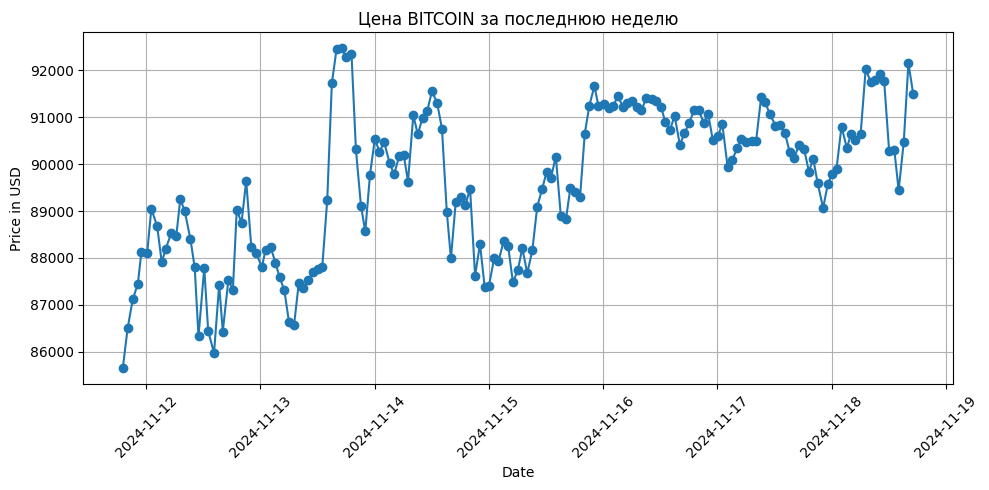


Меню:
1. Добавить Криптовалюту
2. Удалить Криптовалюту
3. Просмотреть Портфолио
4. Визуализируйте Исторические данные
5. Выход


KeyboardInterrupt: Interrupted by user

In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class CryptoPortfolio:
    def __init__(self):
        self.portfolio = {}
        self.base_currency = 'usd'

    def get_current_price(self, crypto_id):
        url = f"https://api.coingecko.com/api/v3/simple/price?ids={crypto_id}&vs_currencies={self.base_currency}&include_24hr_change=true"
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()[crypto_id]
        else:
            print("Ошибка при выборке ценовых данных.")
            return None

    def add_crypto(self, crypto_id, amount):
        if crypto_id in self.portfolio:
            self.portfolio[crypto_id] += amount
        else:
            self.portfolio[crypto_id] = amount
        print(f"Добавлено {amount} {crypto_id} в портфель.")

    def remove_crypto(self, crypto_id, amount):
        if crypto_id in self.portfolio and self.portfolio[crypto_id] >= amount:
            self.portfolio[crypto_id] -= amount
            if self.portfolio[crypto_id] == 0:
                del self.portfolio[crypto_id]
            print(f"Удалено {amount} {crypto_id} из портфолио.")
        else:
            print("Недостаточно количества для удаления.")

    def calculate_portfolio_value(self):
        total_value = 0
        for crypto_id, amount in self.portfolio.items():
            price_data = self.get_current_price(crypto_id)
            if price_data:
                total_value += price_data['usd'] * amount
        return total_value

    def display_portfolio(self):
        print("\nВаш Крипто-портфель:")
        for crypto_id, amount in self.portfolio.items():
            price_data = self.get_current_price(crypto_id)
            if price_data:
                print(f"{crypto_id.upper()}: {amount} единицы измерения - Текущая Цена: ${price_data['usd']} - изменение за 24 часа: {price_data['usd_24h_change']:.2f}%")
        print(f"Общая Стоимость Портфеля: ${self.calculate_portfolio_value():.2f}")

    def fetch_historical_data(self, crypto_id):
        end_time = datetime.now()
        start_time = end_time - timedelta(days=7)
        url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency={self.base_currency}&from={start_time.timestamp()}&to={end_time.timestamp()}"
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()['prices']
        else:
            print("Ошибка при извлечении исторических данных.")
            return None

    def visualize_historical_data(self, crypto_id):
        historical_data = self.fetch_historical_data(crypto_id)
        if historical_data:
            dates = [datetime.fromtimestamp(price[0] / 1000) for price in historical_data]
            prices = [price[1] for price in historical_data]

            plt.figure(figsize=(10, 5))
            plt.plot(dates, prices, marker='o')
            plt.title(f'Цена {crypto_id.upper()} за последнюю неделю')
            plt.xlabel('Date')
            plt.ylabel('Price in USD')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()
            plt.show()

def main():
    portfolio = CryptoPortfolio()

    while True:
        print("\nМеню:")
        print("1. Добавить Криптовалюту")
        print("2. Удалить Криптовалюту")
        print("3. Просмотреть Портфолио")
        print("4. Визуализируйте Исторические данные")
        print("5. Выход")

        choice = input("Выберите опцию (1-5): ")

        if choice == '1':
            crypto_id = input("Введите идентификатор криптовалюты (например, bitcoin): ")
            amount = float(input("Введите сумму для добавления: "))
            portfolio.add_crypto(crypto_id, amount)
        elif choice == '2':
            crypto_id = input("Введите идентификатор криптовалюты, чтобы удалить: ")
            amount = float(input("Введите сумму для удаления: "))
            portfolio.remove_crypto(crypto_id, amount)
        elif choice == '3':
            portfolio.display_portfolio()
        elif choice == '4':
            crypto_id = input("Введите идентификатор криптовалюты для получения исторических данных: ")
            portfolio.visualize_historical_data(crypto_id)
        elif choice == '5':
            break
        else:
            print("Ошибка. Попробуйте еще раз.")

main()


# Дополнительно: Задание 4

Задание 4: Проектное

Вам необходимо самостоятельно найти откртое API предоставляющее информацию в открытом доступе и реализовать собственный проект!


Критерии приемки результата:

- Проект включает в себя не менее 5 возможостей для пользователя
- Проект позволяет использовать все возможности проекта пользователю при помощи взаимодействия через коммандную строку
- Проект работает с открытым API (это значит что при проверке вашей работы преподавателем, преподавателю необходимо просто запустить ячейку с кодом вашего проекта и она будет работать без дополнительных манипуляции)
- Проект должен обязательно включать в себя ряд используемых конструкции:
    - Функции
    - Условные конструкции
    - Ввод/вывод
    - Словари/Списки
- Допускается использование библиотек:
    - requests
    - datetime
    - random

**Здесь добавьте описание вашего проекта**

In [ ]:
#  А здесь код